In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import gc
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
df = pd.read_parquet('/kaggle/input/visual-taxonomy/category_attributes.parquet')
print(df.head())

              Category  No_of_attribute  \
0          Men Tshirts                5   
1               Sarees               10   
2               Kurtis                9   
3        Women Tshirts                8   
4  Women Tops & Tunics               10   

                                      Attribute_list  
0  [color, neck, pattern, print_or_pattern_type, ...  
1  [blouse_pattern, border, border_width, color, ...  
2  [color, fit_shape, length, occasion, ornamenta...  
3  [color, fit_shape, length, pattern, print_or_p...  
4  [color, fit_shape, length, neck_collar, ocassi...  


In [27]:
train_path = "/kaggle/input/visual-taxonomy/train.csv"
train_df = pd.read_csv(train_path)
train_df[train_df['Category'] == 'Sarees']

,id,Category,len,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10
7267,7432,Sarees,10,same as saree,woven design,small border,multicolor,party,jacquard,woven design,zari woven,applique,no
7268,7433,Sarees,10,NaN,zari,small border,cream,traditional,NaN,NaN,zari woven,elephant,no
7269,7434,Sarees,10,NaN,zari,small border,white,party,NaN,NaN,zari woven,floral,no
7270,7435,Sarees,10,same as saree,woven design,big border,default,traditional,NaN,same as saree,zari woven,ethnic motif,no
7271,7436,Sarees,10,solid,no border,NaN,NaN,daily,NaN,NaN,NaN,NaN,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25608,25773,Sarees,10,NaN,zari,small border,cream,party,NaN,NaN,zari woven,peacock,no
25609,25774,Sarees,10,NaN,no border,no border,default,party,NaN,zari woven,zari woven,default,no
25610,25775,Sarees,10,NaN,zari,small border,cream,party,NaN,NaN,zari woven,peacock,no
25611,25776,Sarees,10,NaN,temple border,small border,cream,party,NaN,NaN,zari woven,peacock,no


In [28]:
l = df['Attribute_list'][1] #Sarees
for item in l :
    print(item)

blouse_pattern
border
border_width
color
occasion
ornamentation
pallu_details
pattern
print_or_pattern_type
transparency


In [29]:
for i in range(1,11) :
    temp = train_df.groupby(f'attr_{i}').apply(len)
    print(temp) 
    print('--------------------------------------------')
    print('\n')
    
#color, fs, length, pattern, pp

attr_1
black             7901
blue              1371
default           9268
green              924
grey               137
maroon            2597
multicolor        4076
navy blue         1140
orange              33
peach              397
pink              3132
purple             170
red               2178
same as border    1611
same as saree     5230
solid              188
white             8402
yellow            3112
dtype: int64
--------------------------------------------


attr_2
a-line            2066
boxy              2975
default           1790
fitted            5523
loose             1483
no border          313
polo              3085
regular          17222
round             3059
solid              411
straight          1165
temple border     1296
woven design      6262
zari              8542
dtype: int64
--------------------------------------------


attr_3
big border       5781
calf length      1352
crop            12418
knee length      2048
long             1682
no border    

/tmp/ipykernel_30/3070050773.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp = train_df.groupby(f'attr_{i}').apply(len)
/tmp/ipykernel_30/3070050773.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  temp = train_df.groupby(f'attr_{i}').apply(len)
/tmp/ipykernel_30/3070050773.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a fu

In [30]:
df_women = train_df.loc[train_df['Category'] == 'Sarees']
df_women.reset_index(drop=True, inplace=True)
df_women


,id,Category,len,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10
0,7432,Sarees,10,same as saree,woven design,small border,multicolor,party,jacquard,woven design,zari woven,applique,no
1,7433,Sarees,10,NaN,zari,small border,cream,traditional,NaN,NaN,zari woven,elephant,no
2,7434,Sarees,10,NaN,zari,small border,white,party,NaN,NaN,zari woven,floral,no
3,7435,Sarees,10,same as saree,woven design,big border,default,traditional,NaN,same as saree,zari woven,ethnic motif,no
4,7436,Sarees,10,solid,no border,NaN,NaN,daily,NaN,NaN,NaN,NaN,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18341,25773,Sarees,10,NaN,zari,small border,cream,party,NaN,NaN,zari woven,peacock,no
18342,25774,Sarees,10,NaN,no border,no border,default,party,NaN,zari woven,zari woven,default,no
18343,25775,Sarees,10,NaN,zari,small border,cream,party,NaN,NaN,zari woven,peacock,no
18344,25776,Sarees,10,NaN,temple border,small border,cream,party,NaN,NaN,zari woven,peacock,no


In [31]:
from keras.utils import normalize, to_categorical
pd.options.mode.chained_assignment = None
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from sklearn.preprocessing import LabelBinarizer
import numpy as np
from tqdm import tqdm
from keras.preprocessing import image
from sklearn.model_selection import train_test_split

In [32]:
df_women.isnull().sum()

id              0
Category        0
len             0
attr_1      10461
attr_2        667
attr_3       2485
attr_4        450
attr_5        697
attr_6      13336
attr_7       9450
attr_8       1881
attr_9       4043
attr_10       528
dtype: int64

In [33]:
pd.notna(3)

True

In [34]:
import pandas as pd
import json

# Initialize a dictionary to store mappings for each attribute
mappings = {}

# Iterate through each attribute column to create and save mappings
for attr in df_women.columns[3:]:  # Adjust column range if necessary
    # Convert column to categorical and get the categories
    c = df_women[attr].astype('category')
    df_women[attr] = c.cat.codes  # Apply cat.codes to the DataFrame
    
    # Store the mapping of integer codes to original categories
    mappings[attr] = dict(enumerate(c.cat.categories))

# Display the mappings for verification
print("Mappings:")
for key, value in mappings.items():
    print(f"{key}: {value}")

# Save mappings to /kaggle/working/ for download
with open("/kaggle/working/attribute_mappings.json", "w") as f:
    json.dump(mappings, f, indent=4)

print("\nMappings saved to /kaggle/working/attribute_mappings.json")


Mappings:
attr_1: {0: 'default', 1: 'same as border', 2: 'same as saree', 3: 'solid'}
attr_2: {0: 'default', 1: 'no border', 2: 'solid', 3: 'temple border', 4: 'woven design', 5: 'zari'}
attr_3: {0: 'big border', 1: 'no border', 2: 'small border'}
attr_4: {0: 'cream', 1: 'default', 2: 'green', 3: 'multicolor', 4: 'navy blue', 5: 'pink', 6: 'white', 7: 'yellow'}
attr_5: {0: 'daily', 1: 'party', 2: 'traditional', 3: 'wedding'}
attr_6: {0: 'default', 1: 'jacquard', 2: 'tassels and latkans'}
attr_7: {0: 'default', 1: 'same as saree', 2: 'woven design', 3: 'zari woven'}
attr_8: {0: 'default', 1: 'printed', 2: 'solid', 3: 'woven design', 4: 'zari woven'}
attr_9: {0: 'applique', 1: 'botanical', 2: 'checked', 3: 'default', 4: 'elephant', 5: 'ethnic motif', 6: 'floral', 7: 'peacock', 8: 'solid'}
attr_10: {0: 'no', 1: 'yes'}

Mappings saved to /kaggle/working/attribute_mappings.json


In [35]:
df_women['attr_4'].unique()

array([ 3,  0,  6,  1, -1,  4,  7,  2,  5], dtype=int8)

In [36]:
# c = df_women['attr_4'].astype('category')

# d = dict(enumerate(c.cat.categories))
# print (d)
# {0: 'english', 1: 'spanish'}


{0: -1, 1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7}


In [37]:
# df_women['attr_1'] = df_women["attr_1"].astype('category').cat.codes
# df_women['attr_2'] = df_women["attr_2"].astype('category').cat.codes
# df_women['attr_3'] = df_women["attr_3"].astype('category').cat.codes
# df_women['attr_4'] = df_women["attr_4"].astype('category').cat.codes
# df_women['attr_5'] = df_women["attr_5"].astype('category').cat.codes
# df_women['attr_6'] = df_women["attr_6"].astype('category').cat.codes
# df_women['attr_7'] = df_women["attr_7"].astype('category').cat.codes
# df_women['attr_8'] = df_women["attr_8"].astype('category').cat.codes
# df_women['attr_9'] = df_women["attr_9"].astype('category').cat.codes
# df_women['attr_10'] = df_women["attr_10"].astype('category').cat.codes


# blouse_pattern
# border
# border_width
# color
# occasion
# ornamentation
# pallu_details
# pattern
# print_or_pattern_type
# transparency


y_blouse_pattern = to_categorical(np.array(df_women['attr_1']))
y_border = to_categorical(np.array(df_women['attr_2']))
y_border_width = to_categorical(np.array(df_women['attr_3']))
y_color = to_categorical(np.array(df_women['attr_4']))
y_occasion = to_categorical(np.array(df_women['attr_5']))
y_ornamentation = to_categorical(np.array(df_women['attr_6']))
y_pallu_details = to_categorical(np.array(df_women['attr_7']))
y_pattern = to_categorical(np.array(df_women['attr_8']))
y_sprint_or_pattern_type = to_categorical(np.array(df_women['attr_9']))
y_transparency = to_categorical(np.array(df_women['attr_10']))



In [38]:
df_women

,id,Category,len,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10
0,7432,Sarees,10,2,4,2,3,1,1,2,4,0,0
1,7433,Sarees,10,-1,5,2,0,2,-1,-1,4,4,0
2,7434,Sarees,10,-1,5,2,6,1,-1,-1,4,6,0
3,7435,Sarees,10,2,4,0,1,2,-1,1,4,5,0
4,7436,Sarees,10,3,1,-1,-1,0,-1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18341,25773,Sarees,10,-1,5,2,0,1,-1,-1,4,7,0
18342,25774,Sarees,10,-1,1,1,1,1,-1,3,4,3,0
18343,25775,Sarees,10,-1,5,2,0,1,-1,-1,4,7,0
18344,25776,Sarees,10,-1,3,2,0,1,-1,-1,4,7,0


In [39]:
print(y_blouse_pattern.shape)

(18346, 4)


In [40]:
df_women['attr_10'].unique()

array([ 0,  1, -1], dtype=int8)

In [11]:
image_directory = "/kaggle/input/visual-taxonomy/train_images/"
SIZE=200
X_dataset = []  
for i in tqdm(range(df_women.shape[0])):
    prep = str(df_women['id'][i])
    prep = '0'*(6-len(prep)) + prep
    img = image.load_img(image_directory +prep+'.jpg', target_size=(SIZE,SIZE,3))
    img = image.img_to_array(img)
    img = img/255.
    X_dataset.append(img)
X = np.array(X_dataset)



100%|██████████| 18346/18346 [02:08<00:00, 142.95it/s]


In [12]:
X.shape

(18346, 200, 200, 3)

In [13]:
len(df_women['attr_1'].unique())

5

In [15]:
# blouse_pattern
# border
# border_width
# color
# occasion
# ornamentation
# pallu_details
# pattern
# print_or_pattern_type
# transparency


NUM_CLASSES_BLOUSE = len(df_women['attr_1'].unique())-1
NUM_CLASSES_BORDER = len(df_women['attr_2'].unique())-1
NUM_CLASSES_BORDER_WIDTH = len(df_women['attr_3'].unique())-1
NUM_CLASSES_COLOR = len(df_women['attr_4'].unique())-1
NUM_CLASSES_OCCASION = len(df_women['attr_5'].unique())-1
NUM_CLASSES_ORNAMENTATION = len(df_women['attr_6'].unique())-1
NUM_CLASSES_PALLU = len(df_women['attr_7'].unique())-1
NUM_CLASSES_PATTERN = len(df_women['attr_8'].unique())-1
NUM_CLASSES_PRINT_OR_PATTERN = len(df_women['attr_9'].unique())-1
NUM_CLASSES_TRANSPARENCY = len(df_women['attr_10'].unique())-1


In [16]:
IMAGE_SIZE = (200, 200, 3)


# Load the base model with pre-trained weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=IMAGE_SIZE)

# Freeze the base model
base_model.trainable = True


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
import keras 

In [18]:
# Combine only the defined categorical arrays into y_combined
y_combined = np.hstack((y_blouse_pattern, y_border, y_border_width, y_color, 
                        y_occasion, y_ornamentation, y_pallu_details, 
                        y_pattern, y_sprint_or_pattern_type, y_transparency))

# Split into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y_combined,
    test_size=0.2,
    random_state=42
)

In [19]:
del X
del train_df 
gc.collect()

0

In [20]:
# Split the combined labels back into their respective arrays for the train set
train_blouse_pattern_labels = y_train[:, :NUM_CLASSES_BLOUSE]
train_border_labels = y_train[:, NUM_CLASSES_BLOUSE:NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER]
train_border_width_labels = y_train[:, NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER:NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER + NUM_CLASSES_BORDER_WIDTH]
train_color_labels = y_train[:, NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER + NUM_CLASSES_BORDER_WIDTH:NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER + NUM_CLASSES_BORDER_WIDTH + NUM_CLASSES_COLOR]
train_occasion_labels = y_train[:, NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER + NUM_CLASSES_BORDER_WIDTH + NUM_CLASSES_COLOR:NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER + NUM_CLASSES_BORDER_WIDTH + NUM_CLASSES_COLOR + NUM_CLASSES_OCCASION]
train_ornamentation_labels = y_train[:, NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER + NUM_CLASSES_BORDER_WIDTH + NUM_CLASSES_COLOR + NUM_CLASSES_OCCASION:NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER + NUM_CLASSES_BORDER_WIDTH + NUM_CLASSES_COLOR + NUM_CLASSES_OCCASION + NUM_CLASSES_ORNAMENTATION]
train_pallu_details_labels = y_train[:, NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER + NUM_CLASSES_BORDER_WIDTH + NUM_CLASSES_COLOR + NUM_CLASSES_OCCASION + NUM_CLASSES_ORNAMENTATION:NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER + NUM_CLASSES_BORDER_WIDTH + NUM_CLASSES_COLOR + NUM_CLASSES_OCCASION + NUM_CLASSES_ORNAMENTATION + NUM_CLASSES_PALLU]
train_pattern_labels = y_train[:, NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER + NUM_CLASSES_BORDER_WIDTH + NUM_CLASSES_COLOR + NUM_CLASSES_OCCASION + NUM_CLASSES_ORNAMENTATION + NUM_CLASSES_PALLU:NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER + NUM_CLASSES_BORDER_WIDTH + NUM_CLASSES_COLOR + NUM_CLASSES_OCCASION + NUM_CLASSES_ORNAMENTATION + NUM_CLASSES_PALLU + NUM_CLASSES_PATTERN]
train_print_or_pattern_type_labels = y_train[:, NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER + NUM_CLASSES_BORDER_WIDTH + NUM_CLASSES_COLOR + NUM_CLASSES_OCCASION + NUM_CLASSES_ORNAMENTATION + NUM_CLASSES_PALLU + NUM_CLASSES_PATTERN:NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER + NUM_CLASSES_BORDER_WIDTH + NUM_CLASSES_COLOR + NUM_CLASSES_OCCASION + NUM_CLASSES_ORNAMENTATION + NUM_CLASSES_PALLU + NUM_CLASSES_PATTERN + NUM_CLASSES_PRINT_OR_PATTERN]
train_transparency_labels = y_train[:, -NUM_CLASSES_TRANSPARENCY:]

# Split the combined labels back into their respective arrays for the validation set
val_blouse_pattern_labels = y_val[:, :NUM_CLASSES_BLOUSE]
val_border_labels = y_val[:, NUM_CLASSES_BLOUSE:NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER]
val_border_width_labels = y_val[:, NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER:NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER + NUM_CLASSES_BORDER_WIDTH]
val_color_labels = y_val[:, NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER + NUM_CLASSES_BORDER_WIDTH:NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER + NUM_CLASSES_BORDER_WIDTH + NUM_CLASSES_COLOR]
val_occasion_labels = y_val[:, NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER + NUM_CLASSES_BORDER_WIDTH + NUM_CLASSES_COLOR:NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER + NUM_CLASSES_BORDER_WIDTH + NUM_CLASSES_COLOR + NUM_CLASSES_OCCASION]
val_ornamentation_labels = y_val[:, NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER + NUM_CLASSES_BORDER_WIDTH + NUM_CLASSES_COLOR + NUM_CLASSES_OCCASION:NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER + NUM_CLASSES_BORDER_WIDTH + NUM_CLASSES_COLOR + NUM_CLASSES_OCCASION + NUM_CLASSES_ORNAMENTATION]
val_pallu_details_labels = y_val[:, NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER + NUM_CLASSES_BORDER_WIDTH + NUM_CLASSES_COLOR + NUM_CLASSES_OCCASION + NUM_CLASSES_ORNAMENTATION:NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER + NUM_CLASSES_BORDER_WIDTH + NUM_CLASSES_COLOR + NUM_CLASSES_OCCASION + NUM_CLASSES_ORNAMENTATION + NUM_CLASSES_PALLU]
val_pattern_labels = y_val[:, NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER + NUM_CLASSES_BORDER_WIDTH + NUM_CLASSES_COLOR + NUM_CLASSES_OCCASION + NUM_CLASSES_ORNAMENTATION + NUM_CLASSES_PALLU:NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER + NUM_CLASSES_BORDER_WIDTH + NUM_CLASSES_COLOR + NUM_CLASSES_OCCASION + NUM_CLASSES_ORNAMENTATION + NUM_CLASSES_PALLU + NUM_CLASSES_PATTERN]
val_print_or_pattern_type_labels = y_val[:, NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER + NUM_CLASSES_BORDER_WIDTH + NUM_CLASSES_COLOR + NUM_CLASSES_OCCASION + NUM_CLASSES_ORNAMENTATION + NUM_CLASSES_PALLU + NUM_CLASSES_PATTERN:NUM_CLASSES_BLOUSE + NUM_CLASSES_BORDER + NUM_CLASSES_BORDER_WIDTH + NUM_CLASSES_COLOR + NUM_CLASSES_OCCASION + NUM_CLASSES_ORNAMENTATION + NUM_CLASSES_PALLU + NUM_CLASSES_PATTERN + NUM_CLASSES_PRINT_OR_PATTERN]
val_transparency_labels = y_val[:, -NUM_CLASSES_TRANSPARENCY:]


In [21]:
# Fine-tune from this layer onwards
fine_tune_at = 145

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [29]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Model input layer
inputs = layers.Input(shape=IMAGE_SIZE)
x = base_model(inputs, training=True)
x = layers.GlobalAveragePooling2D()(x)

# Define output layers for each attribute
output_blouse_pattern = layers.Dense(NUM_CLASSES_BLOUSE, activation='softmax', name='blouse_pattern')(x)
output_border = layers.Dense(NUM_CLASSES_BORDER, activation='softmax', name='border')(x)
output_border_width = layers.Dense(NUM_CLASSES_BORDER_WIDTH, activation='softmax', name='border_width')(x)
output_color = layers.Dense(NUM_CLASSES_COLOR, activation='softmax', name='color')(x)
output_occasion = layers.Dense(NUM_CLASSES_OCCASION, activation='softmax', name='occasion')(x)
output_ornamentation = layers.Dense(NUM_CLASSES_ORNAMENTATION, activation='softmax', name='ornamentation')(x)
output_pallu_details = layers.Dense(NUM_CLASSES_PALLU, activation='softmax', name='pallu_details')(x)
output_pattern = layers.Dense(NUM_CLASSES_PATTERN, activation='softmax', name='pattern')(x)
output_print_or_pattern_type = layers.Dense(NUM_CLASSES_PRINT_OR_PATTERN, activation='softmax', name='print_or_pattern_type')(x)
output_transparency = layers.Dense(NUM_CLASSES_TRANSPARENCY, activation='softmax', name='transparency')(x)

# Define the model with all outputs
model = models.Model(
    inputs=inputs,
    outputs=[
        output_blouse_pattern, output_border, output_border_width, output_color,
        output_occasion, output_ornamentation, output_pallu_details,
        output_pattern, output_print_or_pattern_type, output_transparency
    ]
)

# Compile the model with a loss function for each output
model.compile(
    optimizer=Adam(learning_rate=2*1e-5),
    loss={
        'blouse_pattern': 'categorical_crossentropy',
        'border': 'categorical_crossentropy',
        'border_width': 'categorical_crossentropy',
        'color': 'categorical_crossentropy',
        'occasion': 'categorical_crossentropy',
        'ornamentation': 'categorical_crossentropy',
        'pallu_details': 'categorical_crossentropy',
        'pattern': 'categorical_crossentropy',
        'print_or_pattern_type': 'categorical_crossentropy',
        'transparency': 'categorical_crossentropy'
    },
    metrics=[
        'accuracy',  # Blouse Pattern
        'accuracy',  # Border
        'accuracy',  # Border Width
        'accuracy',  # Color
        'accuracy',  # Occasion
        'accuracy',  # Ornamentation
        'accuracy',  # Pallu Details
        'accuracy',  # Pattern
        'accuracy',  # Print or Pattern Type
        'accuracy'   # Transparency
    ]

)

# Print the model summary to review architecture and layers
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 200, 200,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ resnet50            │ (None, 7, 7,      │ 23,587,712 │ input_layer_2[0]… │
│ (Functional)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ resnet50[1][0]    │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ blouse_pattern      │ (None, 4)         │      8,196 │ global_average_p… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ border (Dense)      │ (None, 6)         │     12,294 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ border_width        │ (None, 3)         │      6,147 │ global_average_p… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ color (Dense)       │ (None, 8)         │     16,392 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ occasion (Dense)    │ (None, 4)         │      8,196 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ornamentation       │ (None, 3)         │      6,147 │ global_average_p… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pallu_details       │ (None, 4)         │      8,196 │ global_average_p… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pattern (Dense)     │ (None, 5)         │     10,245 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ print_or_pattern_t… │ (None, 9)         │     18,441 │ global_average_p… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transparency        │ (None, 2)         │      4,098 │ global_average_p… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 23,686,064 (90.36 MB)

 Trainable params: 14,548,528 (55.50 MB)

 Non-trainable params: 9,137,536 (34.86 MB)

In [30]:
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
train_datagen = ImageDataGenerator(rotation_range=45,
    width_shift_range=0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

In [32]:
class MultiLabelDataGenerator(Sequence):
    def __init__(self, images, labels, batch_size, datagen):
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.datagen = datagen
        self.indices = np.arange(len(images))

    def __len__(self):
        return int(np.ceil(len(self.images) / self.batch_size))

    def __getitem__(self, idx):
        batch_indices = self.indices[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_images = self.images[batch_indices]
        batch_labels = {key: label[batch_indices] for key, label in self.labels.items()}
        
        # Apply data augmentation
        batch_images = np.array([self.datagen.random_transform(img) for img in batch_images])

        return batch_images, batch_labels

In [33]:
train_labels = {
    'blouse_pattern': train_blouse_pattern_labels,
    'border': train_border_labels,
    'border_width': train_border_width_labels,
    'color': train_color_labels,
    'occasion': train_occasion_labels, 
    'ornamentation': train_ornamentation_labels,
    'pallu_details': train_pallu_details_labels,
    'pattern': train_pattern_labels,
    'print_or_pattern_type': train_print_or_pattern_type_labels, 
    'transparency': train_transparency_labels
}

batch_size = 32
train_generator = MultiLabelDataGenerator(X_train, train_labels, batch_size, train_datagen)


In [34]:
checkpoint_filepath = '/kaggle/working/checkpoint.model.keras'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_color_accuracy',
    mode='max',
    save_best_only=True)

In [35]:
history = model.fit(
    train_generator,  # Image data
    validation_data=(X_val, {
        'blouse_pattern': val_blouse_pattern_labels,
        'border': val_border_labels,
        'border_width': val_border_width_labels,
        'color': val_color_labels,
        'occasion': val_occasion_labels, 
        'ornamentation': val_ornamentation_labels,
        'pallu_details': val_pallu_details_labels,
        'pattern': val_pattern_labels,
        'print_or_pattern_type': val_print_or_pattern_type_labels, 
        'transparency': val_transparency_labels
    }),
    epochs=50,
    callbacks=[model_checkpoint_callback]
)


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1730379925.993655     262 service.cc:145] XLA service 0x7e9224004ff0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730379925.994413     262 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730379925.994421     262 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  1/459 ━━━━━━━━━━━━━━━━━━━━ 8:34:29 67s/step - blouse_pattern_accuracy: 0.0312 - border_accuracy: 0.1250 - border_width_accuracy: 0.0000e+00 - color_accuracy: 0.1250 - loss: 15.5719 - occasion_accuracy: 0.2812 - ornamentation_accuracy: 0.3125 - pallu_details_accuracy: 0.3750 - pattern_accuracy: 0.2188 - print_or_pattern_type_accuracy: 0.0312 - transparency_accuracy: 0.8750

I0000 00:00:1730379975.179005     262 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


459/459 ━━━━━━━━━━━━━━━━━━━━ 250s 399ms/step - blouse_pattern_accuracy: 0.5980 - border_accuracy: 0.5401 - border_width_accuracy: 0.7157 - color_accuracy: 0.4211 - loss: 9.5424 - occasion_accuracy: 0.5991 - ornamentation_accuracy: 0.7305 - pallu_details_accuracy: 0.6548 - pattern_accuracy: 0.8355 - print_or_pattern_type_accuracy: 0.3372 - transparency_accuracy: 0.8088 - val_blouse_pattern_accuracy: 0.6223 - val_border_accuracy: 0.5970 - val_border_width_accuracy: 0.7842 - val_color_accuracy: 0.4251 - val_loss: 8.3989 - val_occasion_accuracy: 0.6259 - val_ornamentation_accuracy: 0.7403 - val_pallu_details_accuracy: 0.6545 - val_pattern_accuracy: 0.8477 - val_print_or_pattern_type_accuracy: 0.4711 - val_transparency_accuracy: 0.8035
Epoch 2/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 145s 311ms/step - blouse_pattern_accuracy: 0.6493 - border_accuracy: 0.6007 - border_width_accuracy: 0.7923 - color_accuracy: 0.4940 - loss: 8.2550 - occasion_accuracy: 0.6362 - ornamentation_accuracy: 0.7472 - pallu_de

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



459/459 ━━━━━━━━━━━━━━━━━━━━ 142s 304ms/step - blouse_pattern_accuracy: 0.6788 - border_accuracy: 0.6707 - border_width_accuracy: 0.8447 - color_accuracy: 0.5643 - loss: 6.7612 - occasion_accuracy: 0.6990 - ornamentation_accuracy: 0.7607 - pallu_details_accuracy: 0.6818 - pattern_accuracy: 0.8558 - print_or_pattern_type_accuracy: 0.6046 - transparency_accuracy: 0.8109 - val_blouse_pattern_accuracy: 0.6649 - val_border_accuracy: 0.6643 - val_border_width_accuracy: 0.8286 - val_color_accuracy: 0.5398 - val_loss: 7.0094 - val_occasion_accuracy: 0.6858 - val_ornamentation_accuracy: 0.7561 - val_pallu_details_accuracy: 0.6820 - val_pattern_accuracy: 0.8657 - val_print_or_pattern_type_accuracy: 0.5929 - val_transparency_accuracy: 0.8038
Epoch 43/50
459/459 ━━━━━━━━━━━━━━━━━━━━ 143s 306ms/step - blouse_pattern_accuracy: 0.6791 - border_accuracy: 0.6780 - border_width_accuracy: 0.8448 - color_accuracy: 0.5633 - loss: 6.7384 - occasion_accuracy: 0.6998 - ornamentation_accuracy: 0.7585 - pallu_d

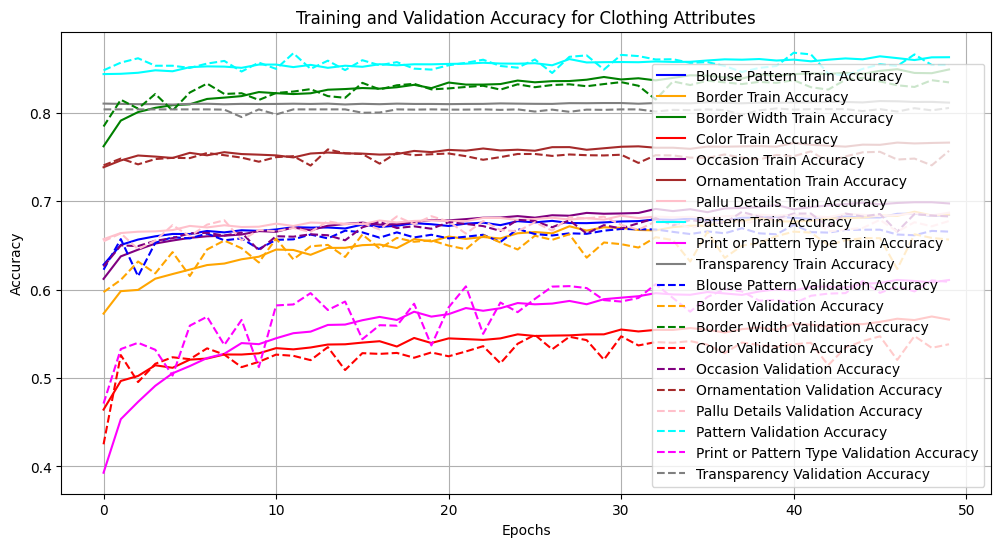

In [36]:
import matplotlib.pyplot as plt

# Assuming 'history' is the output from model.fit()
# Example: history = model.fit(...)

# Plotting the accuracy
plt.figure(figsize=(12, 6))

# Plot training accuracy for each attribute
plt.plot(history.history['blouse_pattern_accuracy'], label='Blouse Pattern Train Accuracy', color='blue')
plt.plot(history.history['border_accuracy'], label='Border Train Accuracy', color='orange')
plt.plot(history.history['border_width_accuracy'], label='Border Width Train Accuracy', color='green')
plt.plot(history.history['color_accuracy'], label='Color Train Accuracy', color='red')
plt.plot(history.history['occasion_accuracy'], label='Occasion Train Accuracy', color='purple')
plt.plot(history.history['ornamentation_accuracy'], label='Ornamentation Train Accuracy', color='brown')
plt.plot(history.history['pallu_details_accuracy'], label='Pallu Details Train Accuracy', color='pink')
plt.plot(history.history['pattern_accuracy'], label='Pattern Train Accuracy', color='cyan')
plt.plot(history.history['print_or_pattern_type_accuracy'], label='Print or Pattern Type Train Accuracy', color='magenta')
plt.plot(history.history['transparency_accuracy'], label='Transparency Train Accuracy', color='gray')

# Plot validation accuracy for each attribute
plt.plot(history.history['val_blouse_pattern_accuracy'], label='Blouse Pattern Validation Accuracy', linestyle='dashed', color='blue')
plt.plot(history.history['val_border_accuracy'], label='Border Validation Accuracy', linestyle='dashed', color='orange')
plt.plot(history.history['val_border_width_accuracy'], label='Border Width Validation Accuracy', linestyle='dashed', color='green')
plt.plot(history.history['val_color_accuracy'], label='Color Validation Accuracy', linestyle='dashed', color='red')
plt.plot(history.history['val_occasion_accuracy'], label='Occasion Validation Accuracy', linestyle='dashed', color='purple')
plt.plot(history.history['val_ornamentation_accuracy'], label='Ornamentation Validation Accuracy', linestyle='dashed', color='brown')
plt.plot(history.history['val_pallu_details_accuracy'], label='Pallu Details Validation Accuracy', linestyle='dashed', color='pink')
plt.plot(history.history['val_pattern_accuracy'], label='Pattern Validation Accuracy', linestyle='dashed', color='cyan')
plt.plot(history.history['val_print_or_pattern_type_accuracy'], label='Print or Pattern Type Validation Accuracy', linestyle='dashed', color='magenta')
plt.plot(history.history['val_transparency_accuracy'], label='Transparency Validation Accuracy', linestyle='dashed', color='gray')

# Adding labels and title
plt.title('Training and Validation Accuracy for Clothing Attributes')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
os.chdir(r'/kaggle/working')

In [38]:
from IPython.display import FileLink

In [40]:
FileLink(r'/kaggle/working/checkpoint.model.keras')

/kaggle/working/checkpoint.model.keras

## Inferencing - In progress

In [41]:
from tensorflow.keras.models import load_model

# Load the best model
best_model = load_model('/kaggle/working/checkpoint.model.keras')


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assume df_women is already defined with your data structure
# Create category mappings from attr columns
blouse_pattern_classes = df_women['attr_1'].unique()
border_classes = df_women['attr_2'].unique()
border_width_classes = df_women['attr_3'].unique()
color_classes = df_women['attr_4'].unique()
occasion_classes = df_women['attr_5'].unique()
ornamentation_classes = df_women['attr_6'].unique()
pallu_details_classes = df_women['attr_7'].unique()
pattern_classes = df_women['attr_8'].unique()
print_or_pattern_type_classes = df_women['attr_9'].unique()
transparency_classes = df_women['attr_10'].unique()

In [48]:
blouse_pattern_classes.sort()
blouplasses

array([-1,  0,  1,  2,  3], dtype=int8)

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Select an index for a validation image
index = 1  # Change this to test different images

# Use the validation image from X_val
new_image = X_val[index:index + 1]  # Shape (1, IMAGE_HEIGHT, IMAGE_WIDTH, 3)

# Get the true labels for this validation image
true_blouse_pattern_label = val_blouse_pattern_labels[index]
true_border_label = val_border_labels[index]
true_border_width_label = val_border_width_labels[index]
true_color_label = val_color_labels[index]
true_occasion_label = val_occasion_labels[index]
true_ornamentation_label = val_ornamentation_labels[index]
true_pallu_details_label = val_pallu_details_labels[index]
true_pattern_label = val_pattern_labels[index]
true_print_or_pattern_type_label = val_print_or_pattern_type_labels[index]
true_transparency_label = val_transparency_labels[index]

# Predict attribute values
predictions = best_model.predict(new_image)
predicted_blouse_pattern = np.argmax(predictions[0])
predicted_border = np.argmax(predictions[1])
predicted_border_width = np.argmax(predictions[2])
predicted_color = np.argmax(predictions[3])
predicted_occasion = np.argmax(predictions[4])
predicted_ornamentation = np.argmax(predictions[5])
predicted_pallu_details = np.argmax(predictions[6])
predicted_pattern = np.argmax(predictions[7])
predicted_print_or_pattern_type = np.argmax(predictions[8])
predicted_transparency = np.argmax(predictions[9])

# Print predicted attributes
print("Predicted attributes:")
print("Blouse Pattern:", blouse_pattern_classes[predicted_blouse_pattern])
print("Border:", border_classes[predicted_border])
print("Border Width:", border_width_classes[predicted_border_width])
print("Color:", color_classes[predicted_color])
print("Occasion:", occasion_classes[predicted_occasion])
print("Ornamentation:", ornamentation_classes[predicted_ornamentation])
print("Pallu Details:", pallu_details_classes[predicted_pallu_details])
print("Pattern:", pattern_classes[predicted_pattern])
print("Print or Pattern Type:", print_or_pattern_type_classes[predicted_print_or_pattern_type])
print("Transparency:", transparency_classes[predicted_transparency])

# Print true labels
print("\nTrue attributes:")
print("Blouse Pattern:", blouse_pattern_classes[np.argmax(true_blouse_pattern_label)])
print("Border:", border_classes[np.argmax(true_border_label)])
print("Border Width:", border_width_classes[np.argmax(true_border_width_label)])
print("Color:", color_classes[np.argmax(true_color_label)])
print("Occasion:", occasion_classes[np.argmax(true_occasion_label)])
print("Ornamentation:", ornamentation_classes[np.argmax(true_ornamentation_label)])
print("Pallu Details:", pallu_details_classes[np.argmax(true_pallu_details_label)])
print("Pattern:", pattern_classes[np.argmax(true_pattern_label)])
print("Print or Pattern Type:", print_or_pattern_type_classes[np.argmax(true_print_or_pattern_type_label)])
print("Transparency:", transparency_classes[np.argmax(true_transparency_label)])

# Plot the validation image
plt.imshow(new_image[0])
plt.axis('off')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predicted attributes:


NameError: name 'blouse_pattern_classes' is not defined